# PROGRAMMING TASK 1 - ST10065806

Link to Data Set : https://www.kaggle.com/datasets/srolka/ecommerce-customers

In this anlaysis we are trying to figure out whether we should focus our efforts on developing the mobile application experince or the website.

## Imports
Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the data

We will be using data from the csv file, which is called Ecommerce Customer. The data contains:

* Customer Email
* Customer Address
* Customer Colour Avatar

Numerical values

* Average Session Length
* Time on App : Time in minute on App by customer.
* Time on Website : Time in minute on website by customer.
* Length of Memebership : How many years the customer has a memebeship for.

In [2]:
# Reading in the Ecommerce Customers CSV file as a datafram called cust

cust = pd.read_csv("Ecommerce Customers.csv")


Checking the first few rows of the data (Head), and checking out the info() and describe() methods

In [3]:
cust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
cust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Anlaysis 

For the rest of the analysis we will only be using the numerical data from the csv file.

**Using seaborn to create a joinplot to compare Time on Website anf Yearly Amount Spent**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

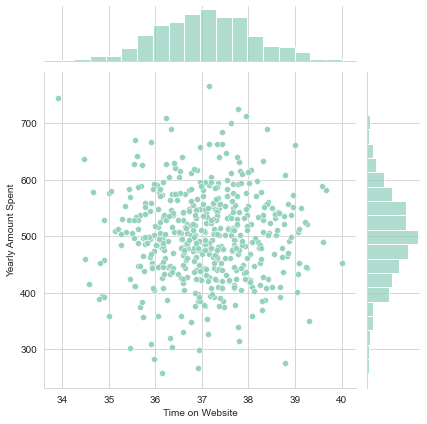

In [7]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=cust)

**Comparing Time on the App and Yearly Amount Spent**

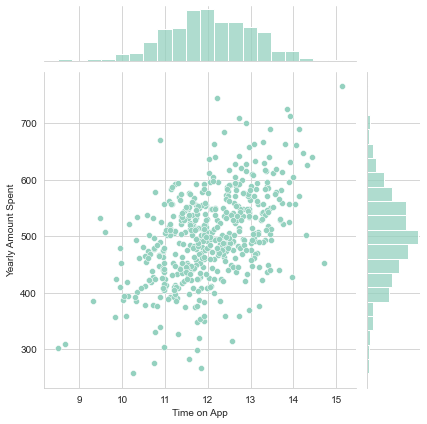

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=cust)

**Comparing Time on the App and Length of Membership**

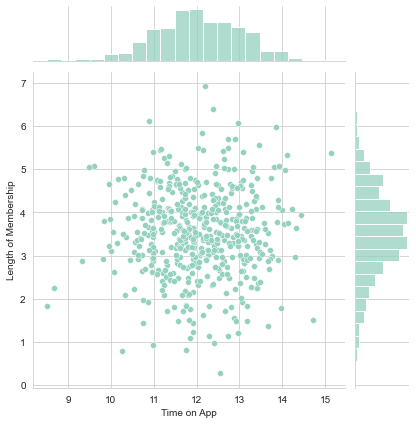

In [9]:
sns.jointplot(x='Time on App', y='Length of Membership', data=cust)

**Below we will be exploring these types of relationships across the entire data set**

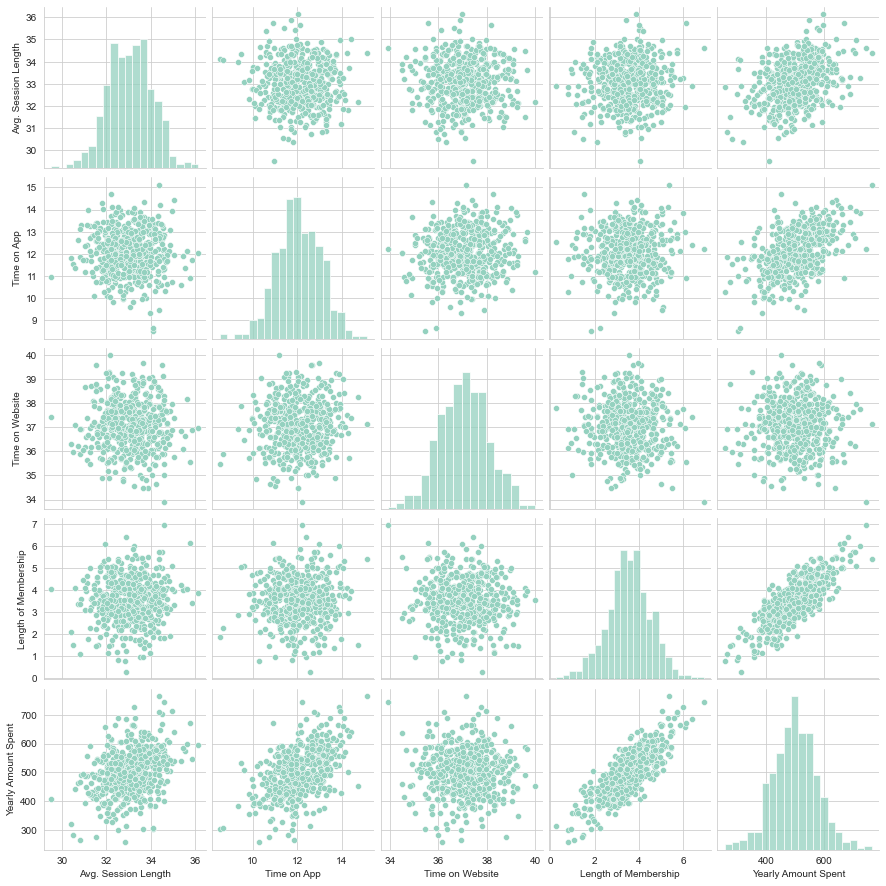

In [10]:
sns.pairplot(cust)

**As seen above the most correlated feature with Yearly Amount is Length of Membership**


*Down below we will create a linear plot of Yearly Amount Spent vs Length of Membership using Seaborn*

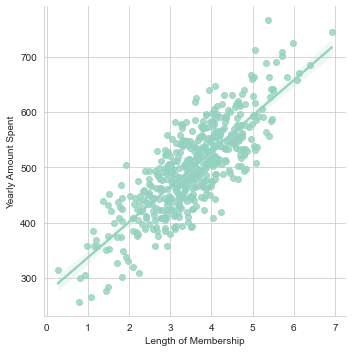

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=cust)

## Training and Testing Data

Now that we have explored the data and undestand a little of whats going on. We are going to split the data into training and testing sets.

In [12]:
y = cust['Yearly Amount Spent']

In [13]:
x = cust[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [14]:
# Using sklearn to split the data into traing and testing set. test_size = 0.3 and random_state=100

from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

## Training the model

We now train our model on our traning data

In [16]:
# Import Linear Regression from sklearn

from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
# Train and fit 'lr' on the training data

lr.fit(x_train,y_train)

LinearRegression()

**Coeddicents of the model**

In [19]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Prediicting Test Data

Fitting the model, evaluating performace bt prediciting off the test values

In [20]:
predictions = lr.predict(x_test)

**Scatteplot of real test value vs the predicted values**

Text(0, 0.5, 'y Predicted')

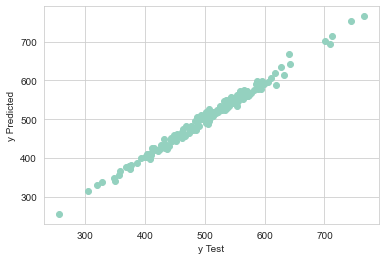

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('y Test')
plt.ylabel('y Predicted')

## Evaluating the Model

Evaluating our model performance

In [22]:
# Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  7.228148653430832
Mean Squared Error:  79.81305165097456
Root Mean Squared Error:  8.93381506697864



## Residuals

We should have got a good model with a good fit however we will explore the residuals to make sure the data is perect

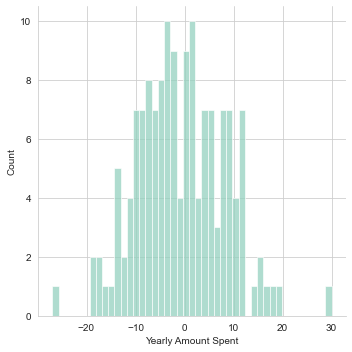

In [23]:
# Plotting using a histogram from deaborn
sns.displot((y_test-predictions), bins=45)

## Conculsion 

**Recreate the dataframe**

In [24]:
coeff = pd.DataFrame(lr.coef_,x.columns)

In [25]:
coeff.columns = ['Coeffecient']
coeff

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coeffecients:

* Keeping all other variables constant, a one-unit increase in Avg. Session Length corresponds to a 25.98 increase in total dollars spent.
* Holding all other attributes constant, a one-unit increase in Time on App is related with a total dollar gain of 38.59.
* Keeping all other factors constant, a one-unit increase in Time on Website is associated with a 0.19-percentage-point rise in total dollars spent.
* Keeping all other attributes constant, a one-unit increase in Length of Membership results in a total dollar gain of 61.27.

**To answer the question from the start, should we focus our efforts on the mobile app or the website?**

This is a delicate situation; there are two options: develop the website to catch up to the performance of the mobile app, or develop the app more because it is working better. This type of response is highly dependent on other aspects within the organisation where the data is from. We should investigate and do more analysis before we can come up with a concrete answer. 